# Comments Sentiment Analysis

In [1]:
# Helper libraries
import warnings

# Scientific and visual libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from emot import UNICODE_EMOJI, EMOTICONS_EMO
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Local Modules
from youtube_analysis.paths import TRANSFORMED_DATA_DIR
from youtube_analysis.cleanutils import translate_emojis, translate_emoticons
from youtube_analysis.edautils import plot_pie

%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Various settings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_colwidth", 40)
pd.set_option("display.precision", 4)
pd.set_option("display.max_columns", None)

In [2]:
# We will use unsupervised method for that because labeling
# all comments will be time-consuming and challeging.
# For that, we can use a rule-based method: VADER.
# The result may not be as accurate as expected since the valence dictionary 
# is not context-specific in VADER.

In [3]:
corpus = pd.read_pickle(TRANSFORMED_DATA_DIR / "processed_corpus.pkl")

### Unsupervised Sentiment Analyse

In [4]:
# We will create 2 functions:
# one for labeling
# one for scoring

sent_analyzer = SentimentIntensityAnalyzer()


def get_sent_label(text="", score=None):
    if not score:
        score = sent_analyzer.polarity_scores(text)["compound"]
    if 0.4 < score:
        return "positive"
    if -0.1 < score <= 0.4:
        return "neutral"
    return "negative"


def get_sent_score(text):
    score = sent_analyzer.polarity_scores(text)["compound"]
    return score

In [5]:
corpus["sent_class"] = corpus.cleaned_text.apply(lambda t: get_sent_label(t))
corpus["sent_score"] = corpus.cleaned_text.apply(lambda t: get_sent_score(t))

In [6]:
corpus.head()

,author,published_at,updated_at,likes,text,cleaned_text,filtered_text,lemmatized_text,sent_class,sent_score
0,Lex Fridman,2022-12-29 17:34:04+00:00,2022-12-29 17:34:04+00:00,194,Here are the timestamps. Please chec...,here are the timestamps please che...,timestamps please check sponsors sup...,timestamps please check sponsor supp...,positive,0.9922
1,Steve C,2023-11-10 22:16:58+00:00,2023-11-10 22:16:58+00:00,0,😳The Plants are Fake…?,the plants are fake,plants fake,plant fake,negative,-0.4767
2,Brigid Mary Prain,2023-11-09 09:51:33+00:00,2023-11-09 09:51:33+00:00,0,Responding to your pushback on the p...,responding to your pushback on the p...,responding pushback pushback circa i...,responding pushback pushback circa i...,positive,0.5859
3,Jack Reacher,2023-11-04 09:30:38+00:00,2023-11-04 09:30:38+00:00,0,"<a href=""https://www.youtube.com/wat...",happy face smiley brutal...,happy face smiley brutal facts plane...,happy face smiley brutal fact planet...,positive,0.6705
4,Oskar Gudnason,2023-11-02 21:47:54+00:00,2023-11-03 12:18:47+00:00,0,Don´t you forget that the ape comes ...,don t you forget that the ape comes ...,forget ape comes also earth returns ...,forget ape come also earth return ea...,positive,0.7512


In [7]:
# Contrary to what has been said about VADER
# It can't classify directly emojis:
get_sent_label("😍")

'neutral'

In [8]:
get_sent_label(translate_emojis("😍"))

'positive'

### Ratio of Sentiments in Comments

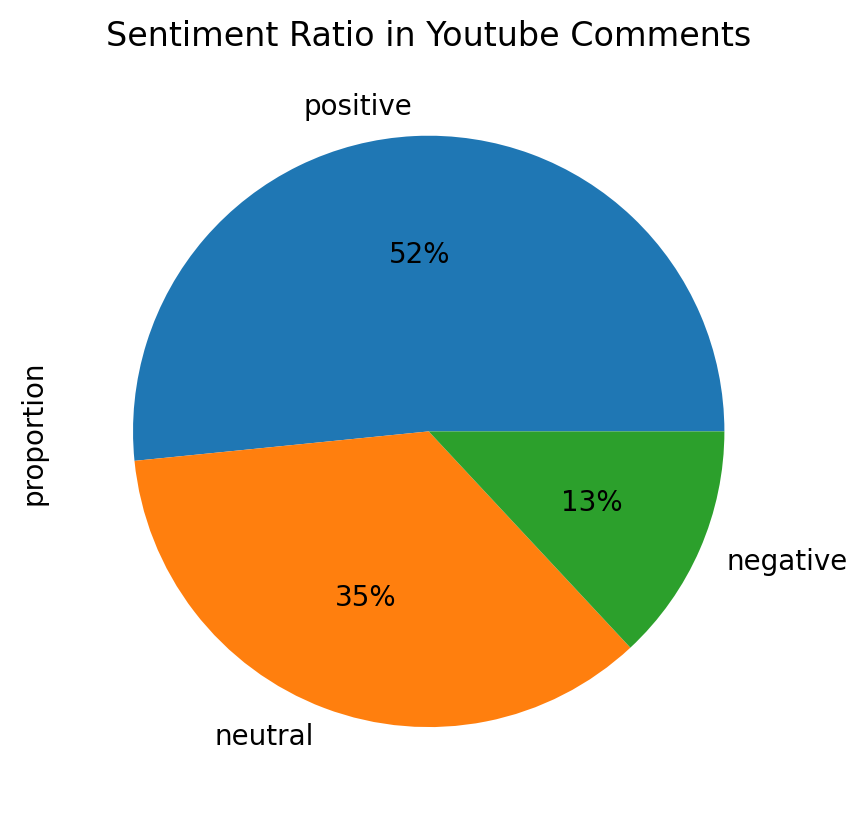

In [10]:
plt.title("Sentiment Ratio in Youtube Comments")
plot_pie(corpus, "sent_class")

In [ ]:
corpus.to_pickle(TRANSFORMED_DATA_DIR / "sentiment_corpus.pkl")